# BLUESKY

This notebook demos the webscraping and analysis abilities of BLUESKY.
BLUESKY is a Python package that returns information about vehicle prices.

In [2]:
# IMPORT STATEMENTS
from BLUESKY.scrapers.bs4_scraper import scrape_data_payload
from BLUESKY.scrapers.genurls import gen_cars_com_urls
from BLUESKY.stats.clean import calc_pct_deltas, sort_trims, process_data_payload

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Generating Target URLS to scrape from

In [53]:
car_dict = {
    #"ford": ["mustang", "f_150"],
    "chevrolet": ["camaro"],
    #"toyota": ["camry", "supra"],
    #"bmw": ["330", "z4", "430", "m340", "m440",],
    #"audi": ["a4", "s4", "s3", "a5", "s5"],
    #"audi": ["rs3"]
    #"subaru": ["brz"],
    #"acura": ["integra"],
    #"lexus": ["rc_f"],
    #"tesla": ["model_s"],
    #"porsche": ["718_cayman", "718_boxster"],
}

url_targets = gen_cars_com_urls(input_dict=car_dict)
url_targets


['https://www.cars.com/shopping/results/?stock_type=all&makes=chevrolet&models=chevrolet-camaro&zip=15238&maximum_distance=250&page_size=40&clean_title=true&no_accidents=true&personal_use=true',
 'https://www.cars.com/shopping/results/?stock_type=all&makes=chevrolet&models=chevrolet-camaro&zip=47907&maximum_distance=250&page_size=40&clean_title=true&no_accidents=true&personal_use=true',
 'https://www.cars.com/shopping/results/?stock_type=all&makes=chevrolet&models=chevrolet-camaro&zip=78701&maximum_distance=250&page_size=40&clean_title=true&no_accidents=true&personal_use=true',
 'https://www.cars.com/shopping/results/?stock_type=all&makes=chevrolet&models=chevrolet-camaro&zip=95814&maximum_distance=250&page_size=40&clean_title=true&no_accidents=true&personal_use=true',
 'https://www.cars.com/shopping/results/?stock_type=all&makes=chevrolet&models=chevrolet-camaro&zip=14623&maximum_distance=250&page_size=40&clean_title=true&no_accidents=true&personal_use=true']

In [54]:
temp = scrape_data_payload(url_targets)

Processing the scraped data

In [55]:
columns = ["make", "model", "model_year", "trim", "mileage", "price", "listing_id", "bodystyle", ] 

df = pd.DataFrame(temp, columns=columns)

In [56]:
scraped_results = {}
cat_model_list = []
for make in car_dict.keys():
    for model in car_dict[make]:
        filt = (df["make"]==make) & (df["model"]==model)
        scraped_results[make+"_"+model] = df[filt]


In [76]:
%%capture --no-stdout --no-display

#m340 = scraped_results["bmw_m340"]
#m440 = scraped_results["bmw_m440"]
#a4 = scraped_results["audi_a4"]
#s3 = scraped_results["audi_s3"]
#camry = scraped_results["toyota_camry"]
#brzs = scraped_results["subaru_brz"]
#brzs.dropna(inplace=True)
#rcfs = scraped_results["lexus_rc_f"]
#mustangs = scraped_results["ford_mustang"]
#models = scraped_results["tesla_model_s"]
#caymans = scraped_results["porsche_718_cayman"]
#boxsters = scraped_results["porsche_718_boxster"]
camaros = scraped_results["chevrolet_camaro"]
camaros = camaros.dropna()

#m440_mod = sort_trims(m440)
#a4 = sort_trims(a4)
#camry = sort_trims(camry,spec="se")
#mustangs = sort_trims(mustangs,spec="ecoboost")
trims, counts = np.unique(np.array(camaros["trim"]),return_counts=True)
for e in zip(trims,counts):
    print(e)

camaros_trimmed = sort_trims(camaros, spec="lt1")

#m340 = calc_pct_deltas(m340)
#m440 = calc_pct_deltas(m440)
#a4 = calc_pct_deltas(a4)
#s3 = calc_pct_deltas(s3)
#camry = calc_pct_deltas(camry)
#brzs = calc_pct_deltas(brzs)
#rcfs = calc_pct_deltas(rcfs)
#mustangs = calc_pct_deltas(mustangs)
#models = calc_pct_deltas(models)
#caymans = calc_pct_deltas(caymans)
#boxsters = calc_pct_deltas(boxsters)
camaros = calc_pct_deltas(camaros_trimmed)

#boxsters.dropna(inplace=True)
#caymans.dropna(inplace=True)

('1ls', 2)
('1lt', 51)
('1ss', 27)
('2ls', 4)
('2lt', 22)
('2ss', 33)
('3lt', 2)
('lt1', 20)
('lz', 2)
('rs', 4)
('ss', 8)
('z28', 8)
('zl1', 17)


In [11]:
#plt.figure(1)
#plt.scatter(camry["year_delta"], camry["price_pct"])
#plt.xlabel("years")
#plt.ylabel("pct depreciation")
#
#plt.figure(2)
#plt.scatter(camry["mileage"].values.astype(float)/1000, camry["price_pct"])
#plt.xlabel("miles (1000s)")
#plt.ylabel("pct depreciation")
#
#plt.figure(3)
#ax = plt.axes(projection ="3d")
#ax.scatter3D(camry["year_delta"], camry["mileage"].values.astype(float)/1000, camry["price_pct"])



In [12]:
from scipy.optimize import curve_fit
import scipy.stats as stats

In [78]:
def exp_decay(x,A,B,C):
    """Models exponential decay.

    Args:
        x: independant variable
        A: A
        B: B
        C: C
        
    Returns:
        dependant variable
    """
    return A*np.exp(-B*x) - C

y=camaros_trimmed["price"]
x=camaros_trimmed["mileage"].values.astype(float)/1000

popt, pcov = curve_fit(exp_decay,x,y,p0=[y.max(),1,1],)

,0,1
13,0.672,42224.276915
0,0.755,42194.687201
8,0.755,42194.687201
4,1.650,41878.929447
17,1.703,41860.419669


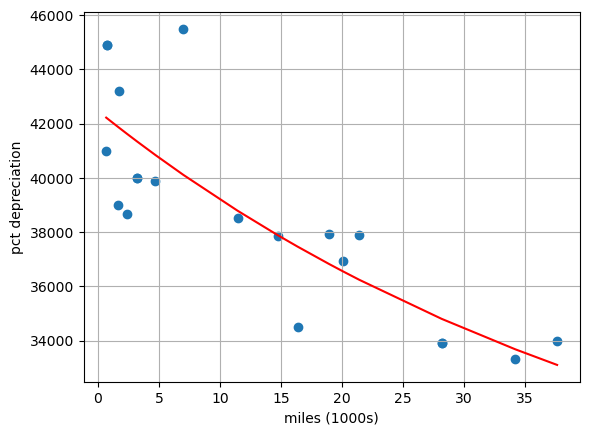

In [79]:
plt.figure(2)
plt.scatter(camaros_trimmed["mileage"].values.astype(float)/1000, camaros_trimmed["price"])
plt.xlabel("miles (1000s)")
plt.ylabel("pct depreciation")

work_price = exp_decay(camaros_trimmed["mileage"].values.astype(float)/1000, popt[0], popt[1], popt[2])

fuckyou = pd.DataFrame([camaros_trimmed["mileage"].values.astype(float)/1000, work_price])
fuckyou = fuckyou.T
fuckyou.sort_values(0,inplace=True)

plt.plot(fuckyou[0], fuckyou[1], c="red")
plt.grid()

fuckyou.head()